<h1> CMPE452 Assignment 1 - Predicting Iris Species using Perceptron </h1>

<i>Authored by: Ben Pang (SN: 10085206)</i>

<p>In this study, we present a basic implementation of a 2 layer perceptron network and use it to predict the Iris Dataset. We compare the results of our perceptron network to the implementation included in Scikit-Learn. Although key differences exist between the two different perceptron implementations, the classification accuracy after 100 training epochs are similar.</p>

<h2> 1. Data Processing </h2>

First, the tools that we will use:

In [121]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Next, we read in the data from the text files into DataFrames:

In [118]:
training_set = pd.read_csv("train.txt", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
testing_set = pd.read_csv("test.txt", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
training_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.4,3.7,1.5,0.2,Iris-setosa
1,4.8,3.4,1.6,0.2,Iris-setosa
2,4.8,3.0,1.4,0.1,Iris-setosa
3,4.3,3.0,1.1,0.1,Iris-setosa
4,5.8,4.0,1.2,0.2,Iris-setosa


We add numeric labels that correspond to each of the string categories. We also shuffle the training set to ensure records are unordered when training the network:

In [3]:
training_set.species = pd.Categorical(training_set.species)
training_set['label'] = training_set.species.cat.codes
testing_set.species = pd.Categorical(testing_set.species)
testing_set['label'] = testing_set.species.cat.codes

training_set = shuffle(training_set)
training_set.head()

,sepal_length,sepal_width,petal_length,petal_width,species,label
15,5.0,3.0,1.6,0.2,Iris-setosa,0
73,5.0,2.3,3.3,1.0,Iris-versicolor,1
2,4.8,3.0,1.4,0.1,Iris-setosa,0
58,6.0,2.9,4.5,1.5,Iris-versicolor,1
32,4.4,3.2,1.3,0.2,Iris-setosa,0


Finally, we separate the dataset into data (X) and labels:

In [66]:
training_x = training_set.iloc[:, 0:4].as_matrix()
training_labels = training_set.label.as_matrix()
training_labels = training_labels.reshape(training_labels.shape[0], 1)

testing_x = testing_set.iloc[:, 0:4].as_matrix()
testing_labels = testing_set.label.as_matrix()

<h2>2. Predicting Iris Species Using Self-Built 2-Layer Perceptron Network

Our implementation of a 2-layer perceptron network uses 3 output nodes, one for each class. For activation, the Heaviside Step Function is used. 

The decision of the network is decided by taking the <i>argmax</i> of the output vector. This is slightly biased since `np.argmax()` will return the index of the first `1` in the output vector in the event that multiple nodes fire at once. 

In [67]:
from network import two_layer_perceptron
ann = two_layer_perceptron(4, 3, 0.5, 0.5)

Before we train the network, capture the initial weights for comparision after training:

In [119]:
initial_weights = ann.output_layer.copy()

<h4> Training </h4>

We train the perceptron network for 100 epochs. The stopping criterion is the number of epochs passed through training. We did not set an accuracy threshold as the stopping criterion because there will likely be a limit to the classification accuracy, and setting a threshold that is too small will cause the network to train indefinitely.

In [68]:
accuracies = ann.train(training_x, training_labels, num_epochs=100)

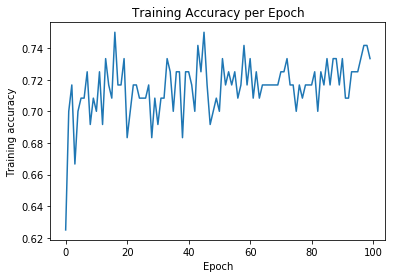

In [69]:
plt.figure()
plt.plot(accuracies)
plt.title('Training Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Training accuracy')
plt.show()

In [70]:
predictions = ann.predict(testing_x)

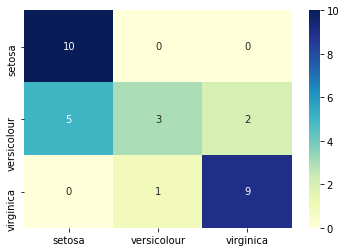

In [104]:
species = ['setosa', 'versicolour', 'virginica']

cm = confusion_matrix(testing_labels, predictions)
cm = pd.DataFrame(cm, index=species, columns=species)
cm_plot = sb.heatmap(cm, annot=True, cmap="YlGnBu")
plt.show()

<h4> Accuracy </h4>

The prediction accuracy for the self-built network is shown below:

In [122]:
accuracy_score(testing_labels, predictions)

0.73333333333333328

<h4> Precision and Recall </h4>

In [113]:
from metrics import precision_recall
stats = precision_recall(cm.as_matrix())

for i, s in enumerate(stats):
    print(f'{species[i]} : {s}')

setosa : {'precision': 0.66666666666666663, 'recall': 1.0}
versicolour : {'precision': 0.75, 'recall': 0.29999999999999999}
virginica : {'precision': 0.81818181818181823, 'recall': 0.90000000000000002}


<h4>Mean Square Error</h4>

Since our predictor is not calculating continuous scores for each class, the mean square error will simply be the count of erroneous classifications.

In [115]:
def mse(y_true, y_pred):
    count = 0
    for i, pred in enumerate(y_pred):
        if(y_pred[i] != y_true[i]):
            count += 1
    return count

In [116]:
mse(testing_labels, predictions)

8

<h2>3. Predicting Iris Species with Scikit-Learn's Perceptron</h2>

Next, we use the perceptron implementation from `sklearn.linear_model` for comparison with our self-built version. The `sklearn` version differs from our self-built version in several key areas. Most significantly, it uses stochastic gradient descent (SGD) to adjust neuron weights instead of our simple learning approach. 

In [36]:
from sklearn.linear_model import Perceptron

In [87]:
classifier = Perceptron(max_iter=100)

In [88]:
classifier = classifier.fit(training_x, training_labels.squeeze())

In [89]:
model_predictions = classifier.predict(testing_x)

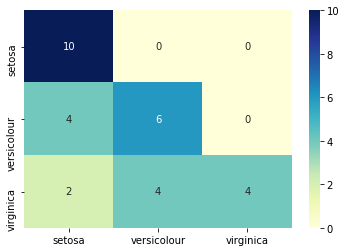

In [94]:
cm2 = confusion_matrix(testing_labels, model_predictions)
cm2 = pd.DataFrame(cm2, index=['setosa', 'versicolour', 'virginica'], columns=['setosa', 'versicolour', 'virginica'])
cm2_plot = sb.heatmap(cm2, annot=True, cmap="YlGnBu")
plt.show()

<h4> Prediction Accuracy</h4>

In [123]:
accuracy_score(testing_labels, model_predictions)

0.66666666666666663

<h4> Precision and Recall</h4>

In [114]:
stats = precision_recall(cm2.as_matrix())

for i, s in enumerate(stats):
    print(f'{species[i]} : {s}')

setosa : {'precision': 0.625, 'recall': 1.0}
versicolour : {'precision': 0.59999999999999998, 'recall': 0.59999999999999998}
virginica : {'precision': 1.0, 'recall': 0.40000000000000002}


<h2> Conclusion </h2>

As can be seen in the results for the two models, after 100 training epochs, our self-built model manages to outperform the `sklearn` implementation in terms of simple prediction accuracy. This is not conclusive evidence to say that the homemade version is superior in any way. In fact, the confusion matrices for the two models indicate that our self-built perceptron network is worse at predicting <i>iris-versicolour</i>, while being better at classifying <i>iris-virginica</i>.